# **Credit Card Fraud Detection**

#### It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Importing Necessary Libraries

In [1]:
# for reading and understanding data
import numpy as np
import pandas as pd
import nannyml as nml
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

# for visualising the data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.graph_objects as px_go
from IPython.display import display

# for implementation and evaluation of predictive models
from sklearn.manifold import TSNE
from sklearn import preprocessing 
from sklearn.pipeline import  Pipeline
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from tensorflow.keras.layers import Input, Dense
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Model, Sequential
from sklearn.ensemble import GradientBoostingClassifier

# avoiding future warning for cleaner output
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Understanding Data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
The dataset is publically available on Kaggle. It can be accessesd from the folowing Link: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

In [2]:
data = pd.read_csv("creditcard.csv")

Understanding the dimensions (rows, columns) of the dataset.

In [3]:
data.shape

(284807, 31)

In [4]:
features = data.columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Checking for any duplicate rows.

In [5]:
data.duplicated().sum()

1081

Removing the duplicate values and keeping the first occurence.

In [6]:
data.drop_duplicates(subset = None, keep = "first", inplace = True)

Descriptive statistics of the dataset.

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Understanding the data type of each column.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

Checking if there are exists any null value. Since there aren't any, we don't need to further perform data cleaning.

In [9]:
data.isnull().any().any()

False

Display the first/last few rows of the data, giving a quick visual inspection.

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Drift Detection with NannyML

The following code segment implements drift detection in transaction data to help you identify potential changes in how features within the dataset are distributed over time. This is important for machine learning models as it can indicate if the patterns the model learned from are still applicable.

To install NannyML, 

Execute the following line on your terminal: 
`pip install git+https://github.com/NannyML/nannyml`

> ### Note: NannyML requires Python version <= 3.11 and >=3.7

In [12]:
split_point = 200000
reference_df = data.iloc[:split_point]
analysis_df = data.iloc[split_point:]

univariate_calculator = nml.UnivariateDriftCalculator(
    column_names=features,
    treat_as_categorical='Class'
)
univariate_calculator.fit(reference_df) 
univariate_drift = univariate_calculator.calculate(analysis_df) 
display(univariate_drift.filter(period='analysis', column_names=['Amount']).to_df())

chunk                                                        \
            chunk                                                         
              key chunk_index start_index end_index start_date end_date   
0        [0:8371]           0           0      8371       None     None   
1    [8372:16743]           1        8372     16743       None     None   
2   [16744:25115]           2       16744     25115       None     None   
3   [25116:33487]           3       25116     33487       None     None   
4   [33488:41859]           4       33488     41859       None     None   
5   [41860:50231]           5       41860     50231       None     None   
6   [50232:58603]           6       50232     58603       None     None   
7   [58604:66975]           7       58604     66975       None     None   
8   [66976:75347]           8       66976     75347       None     None   
9   [75348:83719]           9       75348     83719       None     None   
10  [83720:83725]          10       83720     83725       None     None   

                     Amount                                         
             jensen_shannon                                         
      period          value upper_threshold lower_threshold  alert  
0   analysis       0.015215        0.036258            None  False  
1   analysis       0.025386        0.036258            None  False  
2   analysis       0.019842        0.036258            None  False  
3   analysis       0.020469        0.036258            None  False  
4   analysis       0.019757        0.036258            None  False  
5   analysis       0.020625        0.036258            None  False  
6   analysis       0.019445        0.036258            None  False  
7   analysis       0.026984        0.036258            None  False  
8   analysis       0.029466        0.036258            None  False  
9   analysis       0.032838        0.036258            None  False  
10  analysis       0.105083        0.036258            None   True

Ranks features based on how significantly they have drifted. Useful for prioritizing investigation.

In [13]:
alert_count_ranker = nml.AlertCountRanker()
alert_count_ranked_features = alert_count_ranker.rank(univariate_drift)
display(alert_count_ranked_features.head())

,number_of_alerts,column_name,rank
0,11,Time,1
1,9,V6,2
2,6,V20,3
3,6,V19,4
4,4,V28,5


In [14]:
figure = univariate_drift.filter(column_names=['Amount']).plot()
figure.show()

### Time-Based Feature Engineering and Visualization

In [15]:
data.Time.max() / 3600 / 24

1.9999074074074075

From the above output its clear that the data is of about 2 days. 
Now we will scale (normalize) the 'Time' column into the 0-24 hour range for better pattern detection.

In [16]:
data['Time'] = data['Time'].apply(lambda x : x / 3600 % 24)

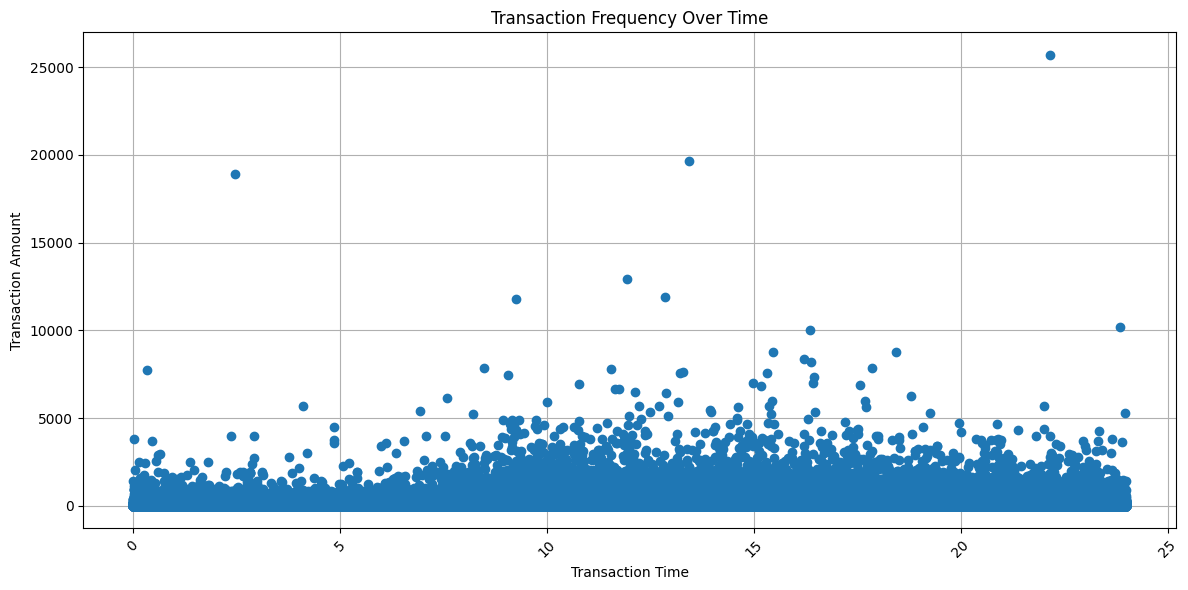

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Amount'], marker='o', linestyle='')
plt.xlabel('Transaction Time')
plt.ylabel('Transaction Amount')
plt.title('Transaction Frequency Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Outlier Analysis of the top ranked features obtained from the drift calculation.

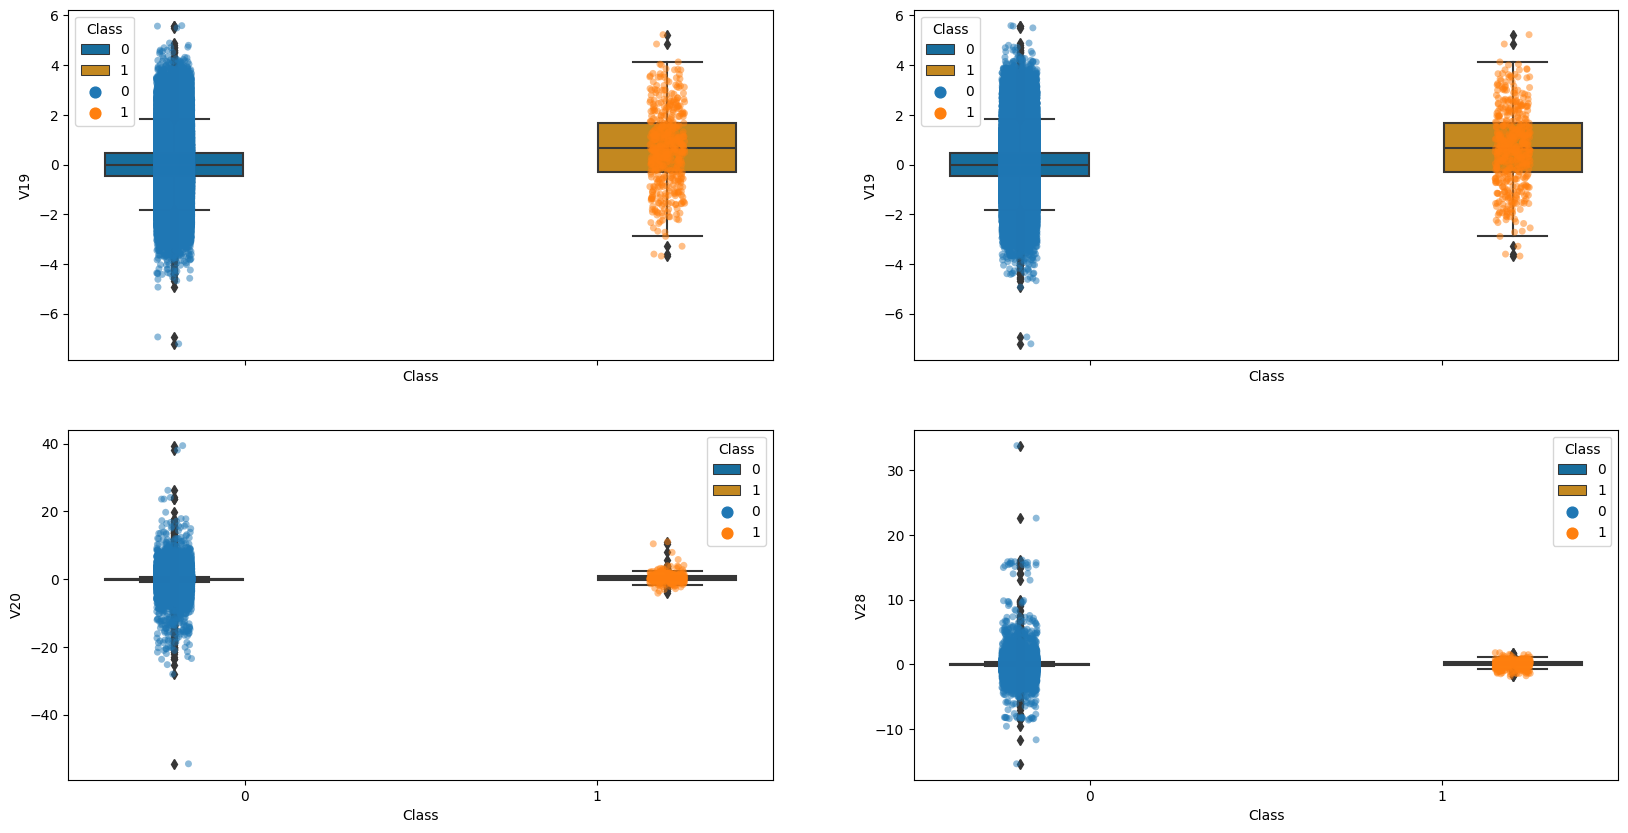

In [18]:
cols = ['V19', 'V19', 'V20', 'V28']
_, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)

for index, col in enumerate(cols):
    sns.boxplot(x='Class', y=col, hue='Class', palette='colorblind', data=data, ax=axes[index//2, index%2]) 
    sns.stripplot(x='Class', y=col,  data=data, dodge=True, jitter=True, marker='o', hue='Class', 
                  ax=axes[index//2, index%2], alpha=0.5)
plt.show()

From the correlation matrix (heatmap) we can see that their doesn't exist any significant relation between the features.

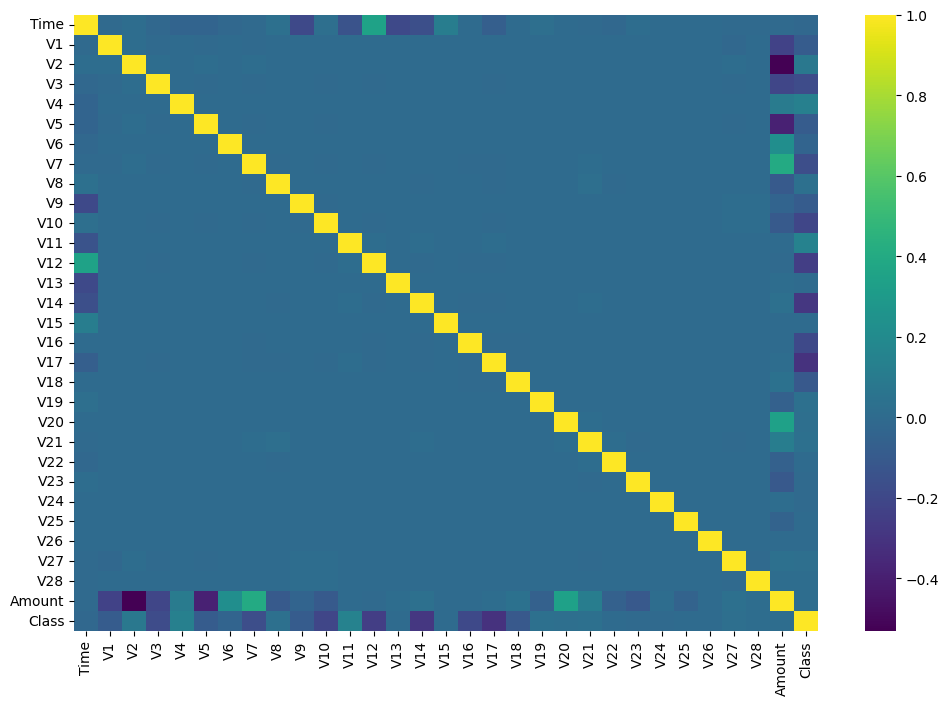

In [19]:
corr= round(data.corr(),2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='viridis', annot=False)
plt.show()

## Data Preparation

### 1. Feature Selection:
Dropping unnecessary variables, keeping only the transaction data the model will use to make predictions.
`Class` column contains the fraud label, which the model will try to predict.

In [20]:
X = data.drop(['Class', 'Time'], axis = 1)
y = data['Class']

### 2. Train-Test Split:
Doing a 70-30 split for training and testing, respectively.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Size for Train data:", len(X_train))
print("Size for Test  data:", len(X_test))

Size for Train data: 198608
Size for Test  data: 85118


### 3. Addressing Class Imbalance (Undersampling):
The dataset have far more normal transactions than fraudulent ones. This class imbalance can make machine learning models less effective at detecting the fraudulent cases. Undersampling helps by reducing the number of majority class examples, forcing the model to focus more on the patterns of the minority (fraud) class. This leads to better detection of fraudulent transactions.

In [22]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [23]:
X_under, y_under = undersample.fit_resample(X, y)
test = pd.DataFrame(y_under, columns = ['Class'])

#### 4. Visualizing the impact of Undersampling
From the below generated graph it can be observed how undersampling reduced the majority class (likely normal transactions) to match the size of the minority class (fraudulent transactions).

Text(0.5, 1.0, 'After')

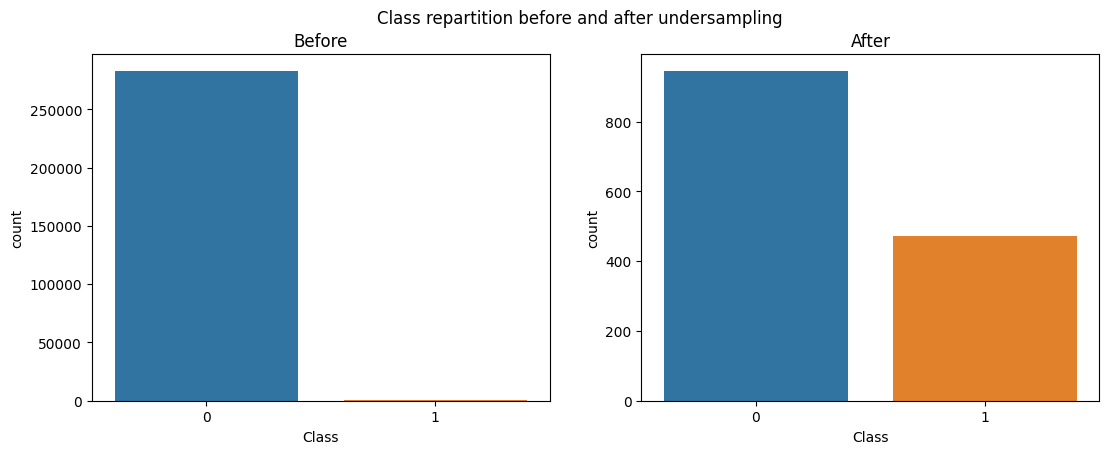

In [24]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

## Model Implementation

### **Multi-Layer Perceptron Classifier:**
The layers of a neural network are made of nodes. A node combines input from the data with a set of coefficients and bias, that either amplify or dampen that input, thereby assigning significance to inputs with regard to the task the algorithm is trying to learn. These input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine whether and to what extent that signal should progress further through the network to affect the ultimate outcome, say, an act of classification. If the signals passes through, the neuron has been “activated.”

In [25]:
ntransformer = SimpleImputer(strategy='median')
preprocessor = ColumnTransformer(transformers=[('num', ntransformer, list(X.columns))])
pipelineMLPC = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000))])
pipelineMLPC.fit(X_under, y_under)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount'])])),
                ('model',
                 MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000))])

In [26]:
preds = pipelineMLPC.predict(X_test)
print("Accuracy score: {:.3f}".format(accuracy_score(y_test, preds)))

Accuracy score: 0.981


### **Autoencoders:**
Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

In [27]:
input_layer = Input(shape=(X.shape[1],))

encoder = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(50, activation='relu')(encoder)

decoder = Dense(50, activation='tanh')(encoder)
decoder = Dense(100, activation='tanh')(decoder)

output_layer = Dense(X.shape[1], activation='relu')(decoder)

In [28]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

In [29]:
x_scale = preprocessing.MinMaxScaler().fit_transform(X.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [30]:
autoencoder.fit(x_norm[0:20000], x_norm[0:20000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5084 - val_loss: 0.0723
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0632 - val_loss: 0.0565
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0540 - val_loss: 0.0517
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0495 - val_loss: 0.0471
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0454 - val_loss: 0.0424
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0407 - val_loss: 0.0381
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0364 - val_loss: 0.0344
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0330 - val_loss: 0.0314
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0294 - val_loss: 0.0285
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 - val_loss: 0.0256


In [31]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])

norm_hidden_rep = hidden_representation.predict(x_norm[:10000])
fraud_hidden_rep = hidden_representation.predict(x_fraud)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step


In [32]:
x_rep = np.append(norm_hidden_rep, fraud_hidden_rep, axis = 0)
norm_y = np.zeros(norm_hidden_rep.shape[0])
fraud_y = np.ones(fraud_hidden_rep.shape[0])
y_rep = np.append(norm_y, fraud_y)

In [33]:
x_train, x_test, yTrain, yTest = train_test_split(x_rep, y_rep, test_size=0.3)
classifier = LogisticRegression(solver='lbfgs').fit(x_train, yTrain)
y_pred = classifier.predict(x_test)
print ("Accuracy Score: ", accuracy_score(yTest, y_pred))

Accuracy Score:  0.9907702100572884
